## Read mCross PWMs

In [16]:
import glob
import torch
import pandas as pd
import numpy as np
import os
import logomaker
import matplotlib.pyplot as plt

def plot_motifs(pwms):
    pwms_norm = pwms - pwms.mean(1,keepdims=True) 
    nMotif = pwms_norm.shape[0]
    plt.figure(figsize=(4,nMotif))
    for i in range(nMotif): 
        ax = plt.subplot(nMotif,1,i+1)
        plt.axis('off')
        pwm_df = pd.DataFrame(data = pwms_norm[i,:,:].t().numpy(), columns=("A","C","G","T"))
        crp_logo = logomaker.Logo(pwm_df, ax=ax) 

base_dir = "/gpfs/commons/home/daknowles/knowles_lab/data/oRNAment/mCross/eCLIP_PWM/"
fns = glob.glob(base_dir + "*.mat")



In [2]:
meta = []
pwms = []
for fn in fns:
    base = os.path.basename(fn)
    ss = base.split(".")
    celltype = ss[0]
    rbp = ss[1]
    idx = ss[-2]
    meta.append( (celltype, rbp, int(idx) ) )

    dat = pd.read_csv(fn, 
                  skiprows = 9, 
                  nrows = 11, 
                  sep = "\t")
    del dat["T"]
    dat.columns = ["A", "C", "G", "T"]
    pwms.append(dat.to_numpy())

In [3]:
meta_df = pd.DataFrame(meta, columns = ("Celltype", "RBP", "ind") )
meta_df.sort_values(["Celltype","RBP","ind"], inplace = True)
meta_df

,Celltype,RBP,ind
709,HepG2,AGGF1,0
291,HepG2,AGGF1,1
32,HepG2,AGGF1,2
174,HepG2,AGGF1,3
68,HepG2,AGGF1,4
...,...,...,...
103,K562,ZRANB2,3
1018,K562,ZRANB2,4
394,K562,ZRANB2,5
425,K562,ZRANB2,6


In [4]:
pwm_stack = np.dstack(pwms)
counts = pwm_stack.transpose((2,1,0))[meta_df.index,:,:]  # Fix ordering
counts.shape

(1071, 4, 11)

In [6]:
counts[0,:,:]

array([[232, 170,  45, 499, 504,  37, 485, 326, 400, 174, 145],
       [ 67,  18,  16,  15,   0,   7,  18,  10,  24,  77,  69],
       [102, 175, 464,  33,  31, 498,  36,  20,  72, 141, 150],
       [154, 192,  30,   8,  20,  13,  16, 199,  59, 163, 191]])

In [7]:
counts_pseudo = counts + 0.1
pfm = counts_pseudo / counts_pseudo.sum(1, keepdims = True)
pwm = np.log(pfm)

In [314]:
base_dir = "/gpfs/commons/groups/knowles_lab/data/oRNAment/mCross/"
np.save(base_dir + "mCross_counts.npy", counts)
np.save(base_dir + "mCross_pwm.npy",  pwm)
meta_df.to_csv(base_dir + "pwm_meta.tsv", sep = "\t", index = False)

In [13]:
base_dir = "/gpfs/commons/groups/knowles_lab/data/oRNAment/mCross/"
counts = np.load(base_dir + "mCross_counts.npy")
pwm = np.load(base_dir + "mCross_pwm.npy")
meta_df = pd.read_csv(base_dir + "pwm_meta.tsv", sep = "\t")
meta_df

,Celltype,RBP,ind
0,HepG2,AGGF1,0
1,HepG2,AGGF1,1
2,HepG2,AGGF1,2
3,HepG2,AGGF1,3
4,HepG2,AGGF1,4
...,...,...,...
1066,K562,ZRANB2,3
1067,K562,ZRANB2,4
1068,K562,ZRANB2,5
1069,K562,ZRANB2,6


HNRNPK motifs in K562

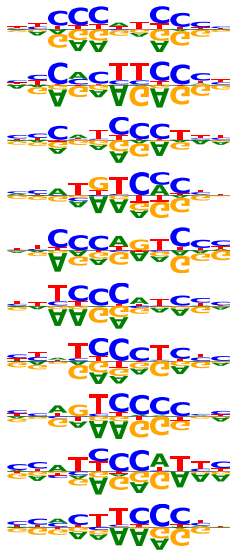

In [17]:
HNRNPK_motifs = (meta_df.RBP == "HNRNPK") & (meta_df.Celltype == "K562").to_numpy()
HNRNPK_pwm = torch.tensor(pwm[HNRNPK_motifs,:,:])
plot_motifs(HNRNPK_pwm)

HNRNPK motifs in HepG2

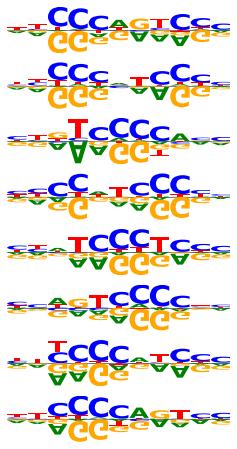

In [320]:
HNRNPK_motifs = (meta_df.RBP == "HNRNPK") & (meta_df.Celltype == "HepG2").to_numpy()
HNRNPK_pwm = torch.tensor(pwm[HNRNPK_motifs,:,:])
plot_motifs(HNRNPK_pwm)

In [ ]:
HNRNPK_pfm = torch.tensor(pwm_t[meta_HNRNPK.index,:,:])
HNRNPK_pwm = (.log()
HNRNPK_pwm -= HNRNPK_pwm.logsumexp( 1, keepdims= True )
plot_motifs(HNRNPK_pwm)